In [5]:
import pandas as pd
data = pd.read_csv("forestfires.csv")
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


1. Forest fires can have devastating impacts on the environment, economy, and society. Understanding the factors that contribute to the occurrence and extent of forest fires is therefore critical for effective forest management and fire prevention. By applying data mining techniques to this dataset , we can analyze large volumes of forest fire data and identify patterns and relationships between different variables. By using regression algorithms such as multivariable linear regression and gradient descent we can try predicting the area of forest fires based on the attributes in the data set.

 Number of Attributes: 12 + output attribute

 Number of Instances: 517 

 Attribute information:
  1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform). 





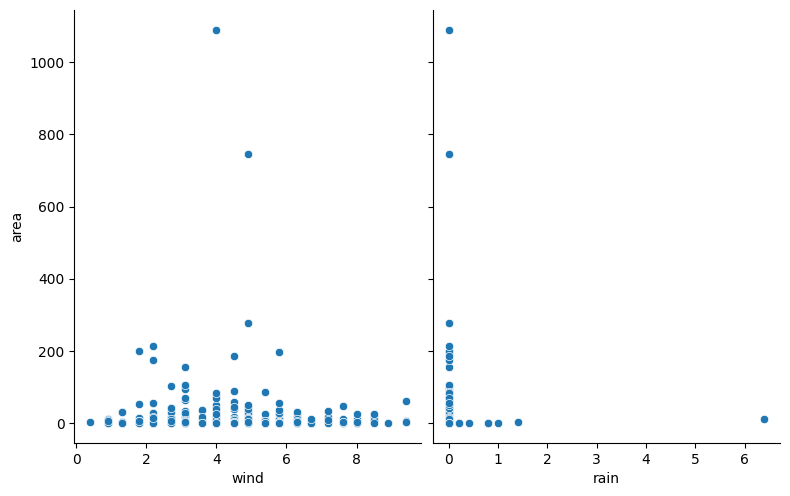

In [7]:
import seaborn
seaborn.pairplot(data, x_vars=['wind','rain'], y_vars='area', height=5, aspect=0.8)


(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

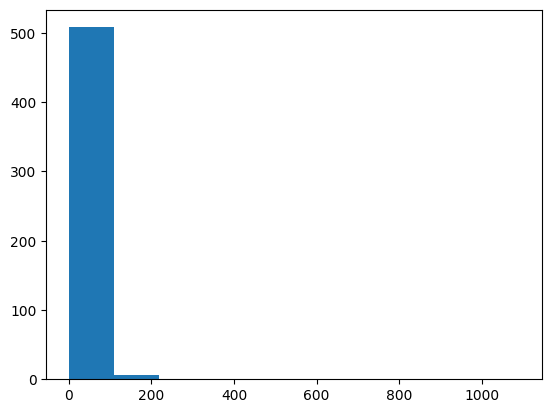

In [8]:
import matplotlib.pyplot as plt

plt.hist(data.area)

(array([275.,  61.,  59.,  54.,  29.,  21.,   9.,   6.,   1.,   2.]),
 array([0.        , 0.69956196, 1.39912393, 2.09868589, 2.79824785,
        3.49780981, 4.19737178, 4.89693374, 5.5964957 , 6.29605766,
        6.99561963]),
 <BarContainer object of 10 artists>)

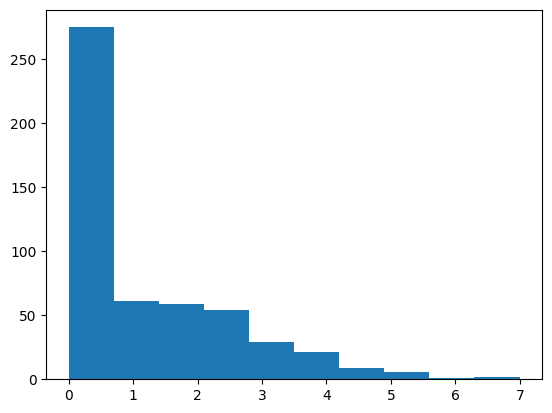

In [9]:
import numpy as np 
logarea = np.log(data.area + 1)
plt.hist(logarea)


Since area is mostly skewed to 0. It is better to apply log(x+1) 

In [10]:
#Switch area with logged area
data['logarea'] = logarea
data = data.drop(columns=['area'])
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,logarea
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [12]:
# create a Python list of feature names
# month and day were removed due to being categorical
feature_cols = ['X','Y','FFMC','DMC','DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

#select the dependent variable
y= data['logarea']


In [13]:
# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# instantiate a linear regression model
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

-0.08273474973194528
[ 5.39345422e-02 -5.56405778e-04  9.16557481e-03 -3.61356392e-04
  5.23051273e-04 -1.21101028e-02 -6.39146585e-05 -6.16579719e-03
  6.83306844e-02 -1.56583039e+00]


In [15]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)


In [16]:
#Calculate mean absolute error
print(metrics.mean_absolute_error(y_test, y_pred))

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

#Calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.244155507725714
2.9770136608158135
1.725402463431594


This is the step for feature selection. As shown by removing the variable rain a decrease in the RMSE occurs which is better for the model. 

In [17]:
# create a Python list of feature names
feature_cols = ['X', 'Y' ,'FFMC','DC', 'ISI', 'temp', 'RH', 'wind']

# use the list to select a subset of the original DataFrame
Xi = data[feature_cols]

# select a Series from the DataFrame
yi = data.logarea

# split into training and testing sets
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(Xi_train, yi_train)

# make predictions on the testing set
y_pred = linreg.predict(Xi_test)

# compute the MSE of our predictions
print(metrics.mean_squared_error(y_test, y_pred))

1.9994976531594537


Now try a different model using polynomial regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
linreg = LinearRegression()

d_range = list(range(1, 11))
d_mse_test = []
d_mse_train = []
# We calculate the accuracy for each degree, let's differentiate the accuracy from the train and test set
for d in d_range:
    poly = PolynomialFeatures(degree=d)
    X_ = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.4, random_state=4)
    linreg.fit(X_, y)
    y_pred = linreg.predict(X_test)

    print("MSE of the L.Reg. with polynomial degree d=" + str(d)+": " + str(metrics.mean_squared_error(y_test, y_pred)))

    d_mse_test.append(metrics.mean_squared_error(y_test, y_pred))
    d_mse_train.append(metrics.mean_squared_error(y_train, linreg.predict(X_train)))

MSE of the L.Reg. with polynomial degree d=1: 1.9558911206357417
MSE of the L.Reg. with polynomial degree d=2: 1.7698993263085274
MSE of the L.Reg. with polynomial degree d=3: 10.763024794249908
MSE of the L.Reg. with polynomial degree d=4: 0.02313706054115964
MSE of the L.Reg. with polynomial degree d=5: 0.023137060548236558
MSE of the L.Reg. with polynomial degree d=6: 0.023137060552874136
MSE of the L.Reg. with polynomial degree d=7: 0.02313706053651406
MSE of the L.Reg. with polynomial degree d=8: 0.023137060536937423
MSE of the L.Reg. with polynomial degree d=9: 0.023134291687543086
MSE of the L.Reg. with polynomial degree d=10: 0.02346680980337112


Text(0, 0.5, 'Mean Squared Error')

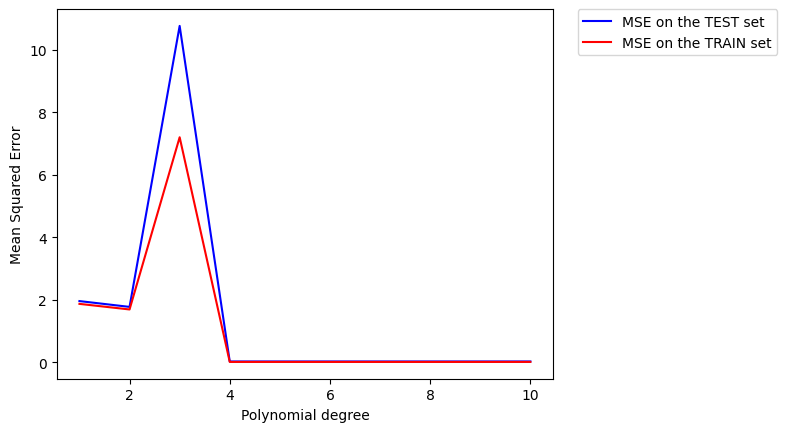

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the values of the accuracy over the training set (overfitted) and over the testing set (better prediciton of the accuracy)
plt.plot(d_range, d_mse_test,'b', label='MSE on the TEST set')
plt.plot(d_range, d_mse_train,'r', label='MSE on the TRAIN set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Polynomial degree')
plt.ylabel('Mean Squared Error')

It appears that the polynomial regression models with degrees higher than 4 have a much lower Mean Squared Error then the multiple linear regression model even after the feature selection was applied, which means that the polynomial regression model with a polyonomial degree higher than 4 has a higher chance of predicting the area of a forest fire better than multiple linear regression model. 

Conclusion: 

In conclusion, this machine learning report aimed to predict the area of forest fires using predictor variables such as temperature, humidity, wind speed, and precipitation. We started by assessing the data and found that the outcome variable was very skewed towards zero, so the function log(x+1) was applied to decrease the skewness, also known as normalization. We compared the performance of two regression models, multiple linear regression and polynomial regression models from degrees 1-10. Although all polynomial models gave a lower Mean Squared Error(except for degree 3) to determine which model gave better results, the polynomial regression models with degrees 4-10 gave a very low MSE of 0.023 compared to a 2.9 given by the multiple linear regression model. Additionally, we improved the performance of the multiple linear regression model removing the rain variable, which resulted in a lower MSE, 1.93, yet it still did not give as good of a performance as the polynomial regression model of degree higher than 4. These findings demonstrate the importance of selecting appropriate regression models and pre-processing techniques when developing predictive models for forest fire areas. Overall, the results of this study could inform forest management strategies and help prevent and mitigate the impacts of forest fires.